## Question 1

Because the posterior is proportional to the product of the prior and the likelihood,


$$p(\theta \mid x) \;\propto\; p(x \mid \theta)\,p(\theta)$$


we re‐normalize that product so the probabilities sum to 1. Provided the prior is a proper distribution (i.e., it sums to 1), this ensures the *posterior* is also a proper probability distribution.

In this example, the posterior is a categorical distribution over those same 101 points. Specifically, each point $\theta_i$ has posterior probability:


$$p_i
\;=\;
\frac{p(x \mid \theta_i)\,p(\theta_i)}
     {\sum_{j=1}^{101} p(x \mid \theta_j)\,p(\theta_j)},
$$

which defines the parameter vector $(p_1,\;p_2,\;\dots,\;p_{101})$ of the categorical distribution.

the posterior is always a proper distribution if the prior is an known distribution



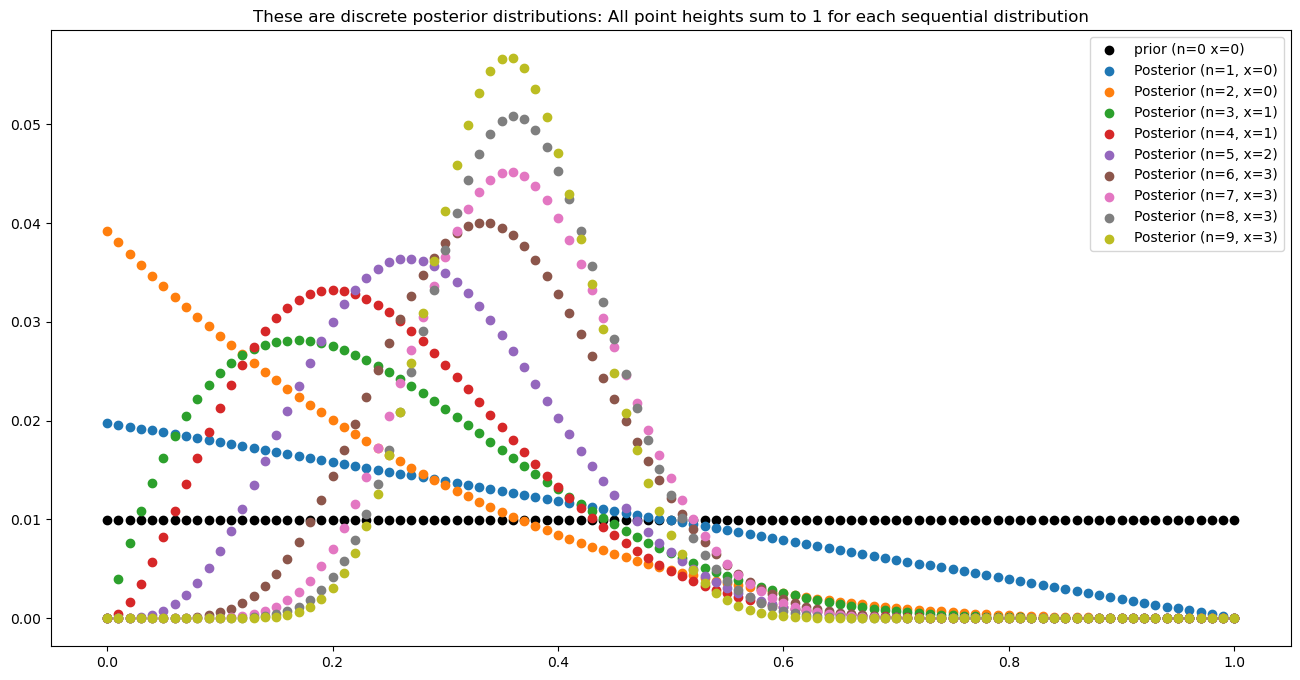

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1  # Increment total trials
    x += observation  # Increment successes if observation is 1

    # Update posterior based on the binomial likelihood
    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n - x)
    posterior = prior * likelihood
    posterior /= posterior.sum()  # Normalize to ensure it sums to 1

    # Update prior for the next iteration (sequential update)
    prior = posterior

    # Plot the posterior distribution
    plt.scatter(
        parameter_domain,
        posterior,
        label=f"Posterior (n={n}, x={x})",
    )


plt.legend();


## Question 2

$$
\begin{aligned}
p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}\\
\text{Beta distribution with parameters: }\alpha_j + x_j^{(t)}, \beta_j + (n_j^{(t)} - x_j^{(t)})
\end{aligned}
$$


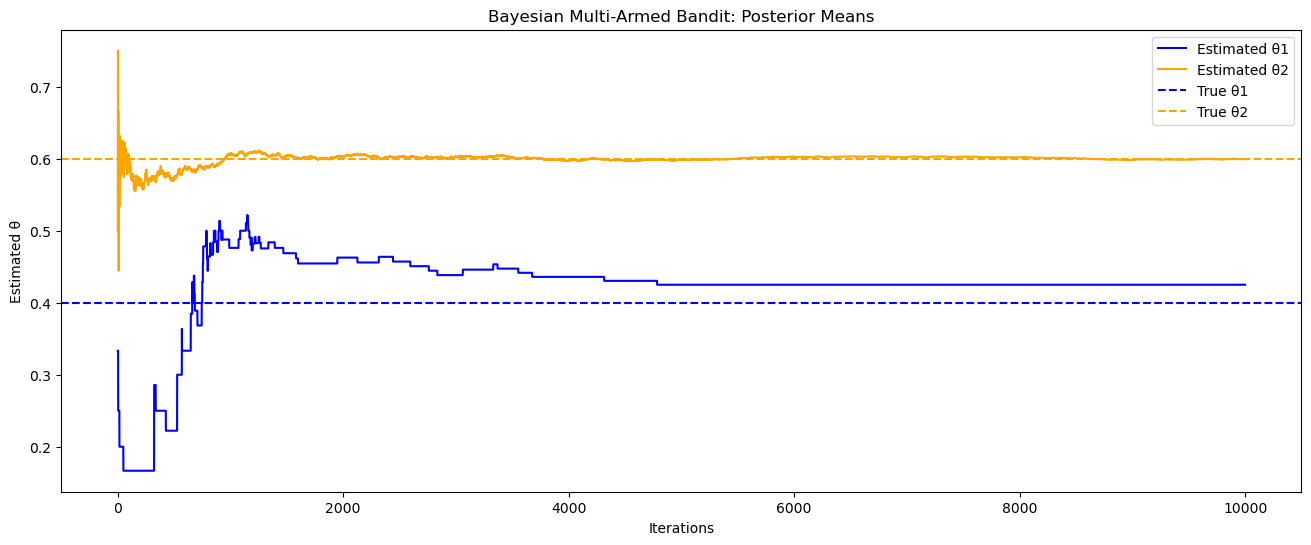

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# True probabilities for the two arms
theta_true_1 = 0.4
theta_true_2 = 0.6

# Initialize Beta parameters for each arm
alpha = [1, 1]  # Prior successes for arms 1 and 2
beta = [1, 1]   # Prior failures for arms 1 and 2

# Number of iterations
iterations = 10000

# Track posterior means over time
theta_estimates_1 = []
theta_estimates_2 = []

# Track the choices made
choices = []

# Simulate the Bayesian Multi-Armed Bandit
for t in range(iterations):
    sampled_theta_1 = np.random.beta(alpha[0], beta[0])
    sampled_theta_2 = np.random.beta(alpha[1], beta[1])
    
    if sampled_theta_1 > sampled_theta_2:
        choice = 0  # Arm 1
    else:
        choice = 1  # Arm 2
    choices.append(choice)
    
    # Simulate a reward based on the true probability of the chosen arm
    if choice == 0:
        reward = np.random.rand() < theta_true_1
    else:
        reward = np.random.rand() < theta_true_2
    
    # Update the Beta parameters for the chosen arm
    alpha[choice] += reward
    beta[choice] += 1 - reward
    
    # Track the mean of the posterior distributions
    theta_estimates_1.append(alpha[0] / (alpha[0] + beta[0]))
    theta_estimates_2.append(alpha[1] / (alpha[1] + beta[1]))

# Plot the estimated probabilities
plt.figure(figsize=(16, 6))
plt.plot(theta_estimates_1, label="Estimated θ1", color='blue')
plt.plot(theta_estimates_2, label="Estimated θ2", color='orange')
plt.axhline(theta_true_1, color='blue', linestyle='--', label="True θ1")
plt.axhline(theta_true_2, color='orange', linestyle='--', label="True θ2")
plt.xlabel("Iterations")
plt.ylabel("Estimated θ")
plt.title("Bayesian Multi-Armed Bandit: Posterior Means")
plt.legend()
plt.show()

## Question 3

Analysis 1 and 2 are different in that each analysis treats each arm differently. For beta-binomial case, it is treating each arm as independent, meaning each arm's success rate is modeled separately using beta prior and updated based on its own data. On the other hand, dirichlet-multinomial assumes that all arms are related, meaning success rates of all arms are jointly modeled using a shared dirichlet prior.

I believe analysis 2 is more appropriate in the real world AB testing context because it is almost impossible to create completely independent arms due to behavioral correlations from the users, shared environments, and methodological constraints. For example, suppose a company is running AB test to determine user preference of a button shape (i.e. circle, square, oval), given all others constant. Here, one might consider these arms (different shapes) to be independent, but in reality they are not.

Users often have overlapping preferences—those who prefer rounded designs may be inclined to click on both the circle and oval buttons. Additionally, the shared testing environment, such as the same website layout, color scheme, or platform, introduces external influences that impact all shapes equally. Furthermore, since the test is conducted on the same user base, factors like demographics or device types are consistent across the arms, creating dependencies. These shared influences make it more appropriate to use analysis 2, which accounts for these relationships through a joint modeling approach, rather than assuming independence.